# Objective: Gain an understanding of Principal Component Analysis

#  Internet Buzz and the Movie Box Office 
In his undergraduate honors thesis, Versaci (2009) investigated what he termed “internet buzz variables” to see whether they provide any additional predictive information towards a movie's box office revenues (beyond movie characteristics like genre, actors, budget, etc.). boxOffice.csv contains this data involving 62 movies (all wide-released movies between November 7, 2008 and April 3, 2009); the variables available (along with their descriptions) are in the table below. We will conduct the analysis ignoring the “buzz” variables (addict, cmngsoon, fandango, and cntwait3) first.

In [12]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA

In [13]:
bo = pd.read_csv('/Users/unmonadas/Desktop/PYTHON PROJECTS/boxOffice.csv')

In [14]:
bo

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


# Question 1 : Plot histograms of the continuous variables (box, budget, starpwr) to see if any transformations are needed. Are any of them skewed? Apply a log-transformation to all the skewed variables.


##### Right skewed and need transformation:
- Budget
- Box
##### Normally distriibuted and don't need transformation
- Starpowr

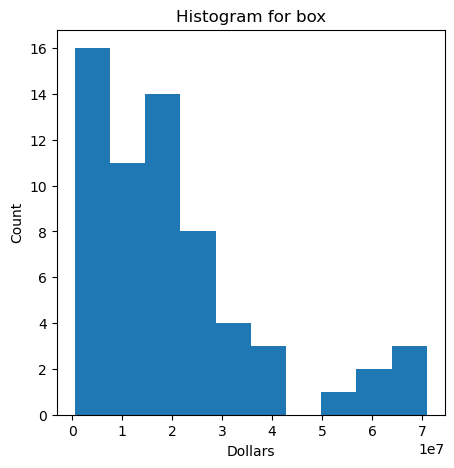

In [15]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['box'])
plt.title("Histogram for box")
plt.xlabel("Dollars")
plt.ylabel("Count")
plt.show()

#right-skewed

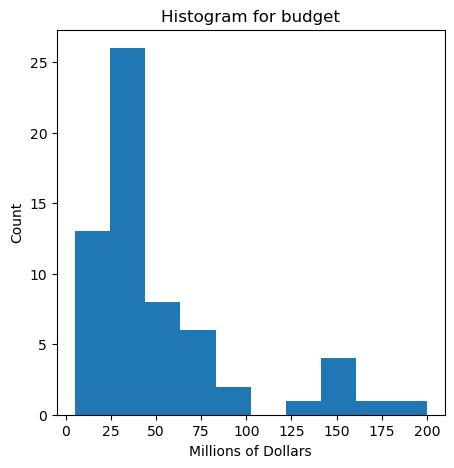

In [11]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['budget'])
plt.title("Histogram for budget")
plt.xlabel("Millions of Dollars")
plt.ylabel("Count")
plt.show()

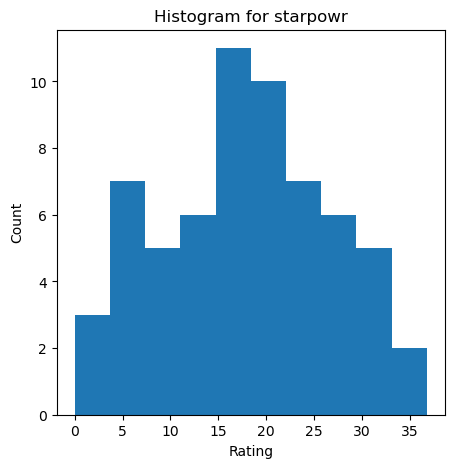

In [193]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['starpowr'])
plt.title("Histogram for starpowr")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [194]:
# ### transforming thr right-skewed variables:
# - Budget
# - Box

bo["lbudget"] = np.log(bo["budget"])
bo["lbox"] = np.log(bo["box"])

In [195]:
bo

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3,lbudget,lbox
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49,3.332205,16.768705
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79,5.010635,17.960336
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36,3.621671,15.502207
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76,5.298317,18.028066
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53,5.010635,17.082152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70,5.164786,17.898476
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62,3.091042,15.488719
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53,2.815409,16.951212
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71,4.442651,18.077493


# Question 2 : Run a linear regression of box office revenues on the “traditional” variables (i.e., using all the independent variables (except the “buzz” variables). If any variables were transformed, be sure to use the transformed versions of those variables. What are the R2 and adjusted- R2 values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (p > |t|)?

In [196]:
x = bo[["G", "PG", "PG13", "lbudget", "starpowr", "sequel", "action", "comedy", "animated", "horror"]]
x = sm.add_constant(x)
y = bo["lbox"]

In [197]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sun, 10 Sep 2023   Prob (F-statistic):             0.0109
Time:                        19:27:04   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5768      0.688     19.727      0.000      12.195      14.959
G              0.2524      0.692      0.365      0.717      -1.137       1.642
PG             0.3297      0.372      0.885      0.380      -0.418       1.077
PG13           0.0718      0.272      0.264      0.793      -0.474       0.618
lbudget        0.7091      0.208      3.407      0.001       0.291       1.127
starpowr       0.0065      0.016      0.403      0.689      -0.026       0.039
sequel         0.6437      0.331      1.942      0.058      -0.022       1.309
action        -0.3068      0.344     -0.892      0.377      -0.997       0.384
comedy        -0.0385      0.321     -0.120      0.905      -0.682       0.605
animated      -0.8203      0.539     -1.523      0.134      -1.902       0.261
horror         1.0264      0.440      2.332      0.024       0.143       1.910
==============================================================================
Omnibus:                        7.632   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.280
Skew:                          -0.626   Prob(JB):                       0.0262
Kurtosis:                       4.119   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 3 : Run another linear regression using only the variables that were significant (again, ignoring the “buzz” variables). What are the R2 and adjusted- R2 values? Are all the variables still significant at the 0.10 level?

In [198]:
x = bo[["lbudget","sequel", "horror"]]
x = sm.add_constant(x)
y = bo["lbox"]

In [199]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           0.000162
Time:                        19:27:04   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8718      0.611     22.700      0.000      12.649      15.095
lbudget        0.6568      0.159      4.124      0.000       0.338       0.976
sequel         0.4994      0.298      1.676      0.099      -0.097       1.096
horror         0.9908      0.385      2.574      0.013       0.220       1.761
==============================================================================
Omnibus:                       17.577   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.607
Skew:                          -0.969   Prob(JB):                     6.14e-07
Kurtosis:                       5.704   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# QUESTION 4 : Plot histograms of the four “buzz” variables. Are any of them skewed? Apply a log-transformation to all the skewed variables.

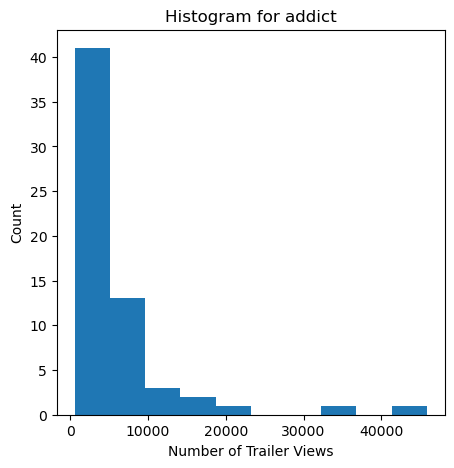

In [200]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['addict'])
plt.title("Histogram for addict")
plt.xlabel("Number of Trailer Views")
plt.ylabel("Count")
plt.show()
#right-skewed

Text(0, 0.5, 'Count')

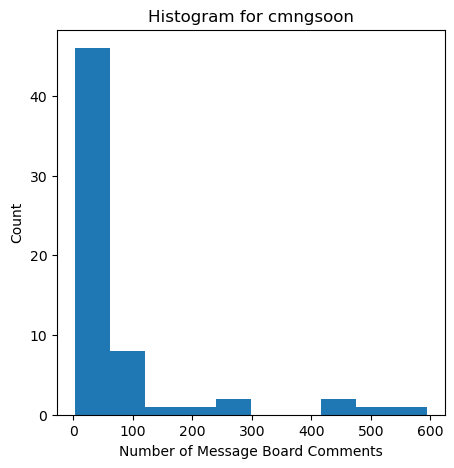

In [201]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['cmngsoon'])
plt.title("Histogram for cmngsoon")
plt.xlabel("Number of Message Board Comments")
plt.ylabel("Count")
#right-skewed

Text(0, 0.5, 'Count')

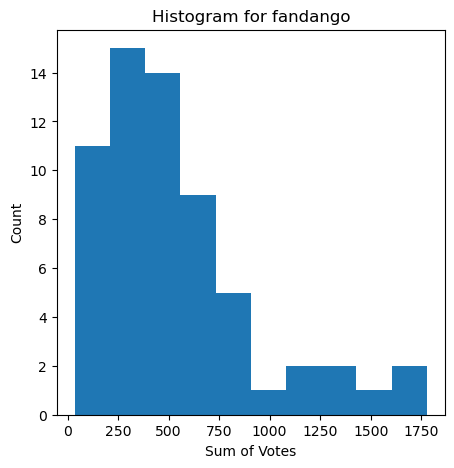

In [202]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['fandango'])
plt.title("Histogram for fandango")
plt.xlabel("Sum of Votes")
plt.ylabel("Count")
#right-skewed

Text(0, 0.5, 'Count')

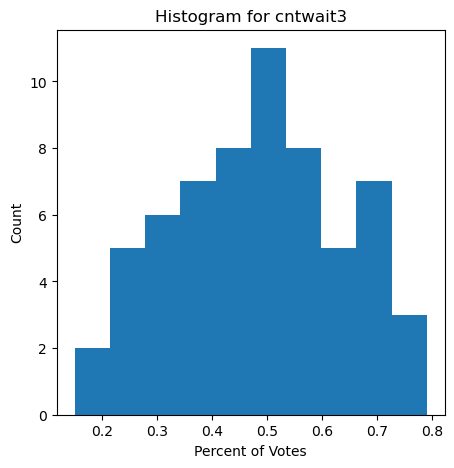

In [203]:
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(bo['cntwait3'])
plt.title("Histogram for cntwait3")
plt.xlabel("Percent of Votes")
plt.ylabel("Count")

In [204]:
"addict", "cmngsoon", "fandango", "cntwait3"

('addict', 'cmngsoon', 'fandango', 'cntwait3')

In [205]:
#log transforming the skewed variables
bo['laddict'] = np.log(bo.addict)
bo['lcmngsoon'] = np.log(bo.cmngsoon)
bo['lfandango'] = np.log(bo.fandango)

In [206]:
bo

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3,lbudget,lbox,laddict,lcmngsoon,lfandango
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49,3.332205,16.768705,8.969605,2.302585,4.969813
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79,5.010635,17.960336,8.654692,4.077537,6.148468
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36,3.621671,15.502207,6.745236,3.178054,5.288267
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76,5.298317,18.028066,9.637306,4.532599,7.483244
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53,5.010635,17.082152,8.428198,3.401197,7.011214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70,5.164786,17.898476,9.114435,4.219508,6.472346
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62,3.091042,15.488719,8.066521,4.543295,3.663562
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53,2.815409,16.951212,9.774745,4.060443,4.804021
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71,4.442651,18.077493,9.269521,6.386879,6.744059


# Question 5: Run a linear regression of box office revenues on all the independent variables, including the “buzz” variables (transformed as needed). What are the R2 and adjusted- R2 values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (p > |t|)?

In [207]:
x = bo[["G", "PG", "PG13", "lbudget", "starpowr", "sequel", "action", "comedy", "animated", "horror", "cntwait3", "laddict", "lcmngsoon", "lfandango"]]
x = sm.add_constant(x)
y = bo["lbox"]

In [208]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.77e-06
Time:                        19:27:06   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4958      0.993     11.581      0.000       9.499      13.493
G              0.6375      0.600      1.063      0.293      -0.569       1.844
PG             0.6054      0.316      1.913      0.062      -0.031       1.242
PG13           0.2171      0.220      0.986      0.329      -0.226       0.660
lbudget        0.2344      0.187      1.256      0.215      -0.141       0.610
starpowr       0.0012      0.013      0.089      0.930      -0.026       0.028
sequel         0.4277      0.305      1.402      0.167      -0.186       1.041
action        -0.8419      0.301     -2.801      0.007      -1.447      -0.237
comedy        -0.0720      0.255     -0.282      0.779      -0.586       0.442
animated      -0.8965      0.437     -2.050      0.046      -1.776      -0.017
horror         0.3233      0.370      0.874      0.386      -0.421       1.067
cntwait3       2.5943      0.927      2.798      0.007       0.729       4.459
laddict        0.2946      0.135      2.175      0.035       0.022       0.567
lcmngsoon      0.0588      0.134      0.439      0.663      -0.211       0.328
lfandango      0.0274      0.117      0.235      0.815      -0.207       0.262
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.502
Skew:                          -0.150   Prob(JB):                        0.778
Kurtosis:                       3.322   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 6 : Run another linear regression using only the variables that were significant. What are the R2 and adjusted- R2 values? Are all the variables still significant at the 0.10 level?

In [209]:
x = bo[["PG", "action", "animated", "cntwait3", "laddict"]]
x = sm.add_constant(x)
y = bo['lbox']

In [210]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           6.06e-09
Time:                        19:27:06   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5048      0.751     16.644      0.000      11.000      14.010
PG             0.3464      0.228      1.519      0.134      -0.110       0.803
action        -0.6530      0.225     -2.896      0.005      -1.105      -0.201
animated      -0.5455      0.322     -1.693      0.096      -1.191       0.100
cntwait3       3.7234      0.702      5.303      0.000       2.317       5.130
laddict        0.2810      0.106      2.662      0.010       0.069       0.492
==============================================================================
Omnibus:                        1.995   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.257
Skew:                          -0.156   Prob(JB):                        0.533
Kurtosis:                       3.624   Cond. No.                         80.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 8: Apply Principal Component Analysis to just the 4 “buzz” variables. If you transformed any of them, make sure you use the transformed versions. Also make sure that you standardize the variables first. What are the eigen values associated with each component? How many principal components are selected using (i) Kaiser's Rule, and using “explained variance" thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90%?

##### Steps for running PCA
1. Standardize the data
2. Perform PCA on the desired variables
    - (optional): Get the eigen values
    - (optional): Get the proportion of variance explained by each PC
    - (optional): Cumulative sum of explained variance
    - (optional): Plot Scree Plot
4. Create a dataframe with transformed components

###### Step 1: Standardize the data

In [211]:
x = bo[["cntwait3", "laddict", "lcmngsoon", "lfandango"]]

In [212]:
sc = prep.StandardScaler()
sX = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sX, axis=0, ddof=1).to_list()
#print(sc.scale_)
sX = sX/sc.scale_
sX

,cntwait3,laddict,lcmngsoon,lfandango
0,0.048398,0.803754,-1.090305,-1.141892
1,1.963723,0.487415,0.393889,0.220592
2,-0.781576,-1.430683,-0.358249,-0.773771
3,1.772190,1.474477,0.774406,1.763547
4,0.303775,0.259896,-0.171659,1.217896
...,...,...,...,...
57,1.389125,0.949239,0.512603,0.594984
58,0.878372,-0.103418,0.783350,-2.651873
59,0.303775,1.612538,0.379595,-1.333542
60,1.452970,1.105027,2.324933,0.909074


In [213]:
#confirming it is standardize i.e. mean is basically all 0
sX.mean()

cntwait3    -3.592556e-16
laddict     -2.686023e-16
lcmngsoon   -1.754869e-16
lfandango   -1.432546e-17
dtype: float64

###### Step 2: Perform PCA on the desired variables

In [214]:
# create pca object
# not specifying the number of components results in all variables being used
pcaBuzz = PCA()
#pass the feature set 
# fit calculates parameters; transform applies the transformation
pcsBuzz = pcaBuzz.fit_transform(sX)

##### - (optional): Get the eigen values

In [215]:
print('\nEigen Values of Correlation Matrix')
print(pcaBuzz.explained_variance_)
#according to Kaiser rule, which states you should only keep components with Eigen values > 1, we only keep PC1_cntwait3


Eigen Values of Correlation Matrix
[2.41420026 0.77519959 0.45214886 0.3584513 ]


#####    - (optional): Get the proportion of variance explained by each PC

In [216]:
expldvarpcaBuzz = pcaBuzz.explained_variance_ratio_
expldvarpcaBuzz

array([0.60355006, 0.1937999 , 0.11303721, 0.08961282])

#####    - (optional): Cumulative sum of explained variance

In [217]:
expldvarsum = np.cumsum(expldvarpcaBuzz)
print('\nCumulative sum of the explained variance')
print(expldvarsum)


Cumulative sum of the explained variance
[0.60355006 0.79734996 0.91038718 1.        ]


#####    - (optional): Plot Scree Plot

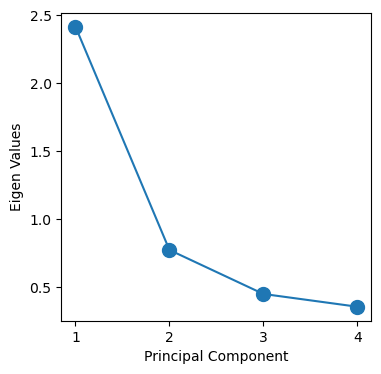

In [218]:
# scree plot (Eigen Values against sorted PCs)
plt.figure(figsize=(4, 4))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.xticks(np.arange(1, 5)) 
plt.plot(np.arange(1,5), pcaBuzz.explained_variance_)
plt.scatter(np.arange(1,5), pcaBuzz.explained_variance_, s = 100)
plt.savefig(r'Scree-PCA.png', transparent = "true")

###### Step 3: Create a dataframe with transformed components

In [219]:
#converting the PCA values to a dataframe
pcsBuzzdf = pd.DataFrame(pcsBuzz, columns = ['PC1_cantwait3', 'PC2_laddict', 'PC3_lcmngsoon', 'PC4_lfandango'])
pcsBuzzdf

,PC1_cantwait3,PC2_laddict,PC3_lcmngsoon,PC4_lfandango
0,-0.591216,1.120419,-0.739575,0.994585
1,1.615992,0.286131,0.763648,1.010510
2,-1.644376,0.055875,0.700252,-0.432820
3,2.806445,-0.742427,-0.229837,0.737825
4,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...
57,1.745896,0.049794,0.073061,0.625717
58,-0.144094,2.643883,1.190069,-0.034036
59,0.695724,1.874180,-0.769292,0.163062
60,2.973264,0.158961,0.468080,-0.692292


In [220]:
#confirming means are still all 0
pcsBuzzdf.mean()

PC1_cantwait3   -2.467085e-17
PC2_laddict     -3.581365e-17
PC3_lcmngsoon    6.267388e-17
PC4_lfandango   -1.701148e-17
dtype: float64

# Question 9: Run a linear regression using all the “traditional” independent variables (if transformed, use the transformed versions) and all 4 principal components (the only variables you should not use here are the four “buzz” variables). What are the R2 and adjusted- R2 values? Which variables (if any) are significant at the 0.10 level? In particular, are any of the principal components significant? What can you say about this model vis-à-vis the other models built so far?

In [221]:
#combining bo and pcsBuzzdf dataframes
bo2 = bo.copy()
for i in pcsBuzzdf.columns:
    bo2[i] = pcsBuzzdf[i]
bo2

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,...,cntwait3,lbudget,lbox,laddict,lcmngsoon,lfandango,PC1_cantwait3,PC2_laddict,PC3_lcmngsoon,PC4_lfandango
0,19167085,0,0,0,28.0,19.83,0,0,1,0,...,0.49,3.332205,16.768705,8.969605,2.302585,4.969813,-0.591216,1.120419,-0.739575,0.994585
1,63106589,0,1,0,150.0,32.69,1,0,0,1,...,0.79,5.010635,17.960336,8.654692,4.077537,6.148468,1.615992,0.286131,0.763648,1.010510
2,5401605,0,0,0,37.4,15.69,0,0,1,0,...,0.36,3.621671,15.502207,6.745236,3.178054,5.288267,-1.644376,0.055875,0.700252,-0.432820
3,67528882,0,0,1,200.0,23.62,1,1,0,0,...,0.76,5.298317,18.028066,9.637306,4.532599,7.483244,2.806445,-0.742427,-0.229837,0.737825
4,26223128,0,1,0,150.0,19.02,0,0,0,1,...,0.53,5.010635,17.082152,8.428198,3.401197,7.011214,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,...,0.70,5.164786,17.898476,9.114435,4.219508,6.472346,1.745896,0.049794,0.073061,0.625717
58,5329240,0,0,1,22.0,4.25,0,1,0,0,...,0.62,3.091042,15.488719,8.066521,4.543295,3.663562,-0.144094,2.643883,1.190069,-0.034036
59,23004765,0,0,1,16.7,5.96,0,0,0,0,...,0.53,2.815409,16.951212,9.774745,4.060443,4.804021,0.695724,1.874180,-0.769292,0.163062
60,70950500,0,0,1,85.0,16.62,1,1,0,0,...,0.71,4.442651,18.077493,9.269521,6.386879,6.744059,2.973264,0.158961,0.468080,-0.692292


In [222]:
x = bo2[["G", "PG", "PG13", "lbudget", "starpowr", "sequel", "action", "comedy", "animated", "horror", "PC1_cantwait3", "PC2_laddict", "PC3_lcmngsoon", "PC4_lfandango"]]
x = sm.add_constant(x)
y = bo2["lbox"]

In [223]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.77e-06
Time:                        19:27:06   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.5293      0.675     22.991      0.000      14.170      16.888
G                 0.6375      0.600      1.063      0.293      -0.569       1.844
PG                0.6054      0.316      1.913      0.062      -0.031       1.242
PG13              0.2171      0.220      0.986      0.329      -0.226       0.660
lbudget           0.2344      0.187      1.256      0.215      -0.141       0.610
starpowr          0.0012      0.013      0.089      0.930      -0.026       0.028
sequel            0.4277      0.305      1.402      0.167      -0.186       1.041
action           -0.8419      0.301     -2.801      0.007      -1.447      -0.237
comedy           -0.0720      0.255     -0.282      0.779      -0.586       0.442
animated         -0.8965      0.437     -2.050      0.046      -1.776      -0.017
horror            0.3233      0.370      0.874      0.386      -0.421       1.067
PC1_cantwait3     0.4183      0.079      5.279      0.000       0.259       0.578
PC2_laddict       0.1424      0.106      1.341      0.186      -0.071       0.356
PC3_lcmngsoon     0.0091      0.159      0.057      0.955      -0.311       0.329
PC4_lfandango     0.2474      0.180      1.376      0.175      -0.114       0.609
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.502
Skew:                          -0.150   Prob(JB):                        0.778
Kurtosis:                       3.322   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 10 : Now run regressions using the number of principal components based on (i) Kaiser's Rule and “explained variance” thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90% (if any of the models are identical, point this out and run it only once). Compare all the regression models involving the principal components (including the one involving all four components). Which of these would you recommend, and why?

##### Threshold 1: Kaiser
##### AND Threshold 2: 60% of cummulative explained variability (Note: same number of PCs used as model using Kaiser threshold)

In [224]:
x = bo2[["G", "PG", "PG13", "lbudget", "starpowr", "sequel", "action", "comedy", "animated", "horror", "PC1_cantwait3"]]
x = sm.add_constant(x)
y = bo2["lbox"]

In [225]:
print("Model with Kaiser threshold\n& 60% of cummulative explained variability variables:")
model = sm.OLS(y, x)
results = model.fit()
results.summary()

Model with Kaiser threshold
& 60% of cummulative explained variability variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.39e-06
Time:                        19:27:07   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.4002      0.643     23.960      0.000      14.109      16.691
G                 0.3844      0.553      0.695      0.490      -0.727       1.495
PG                0.5336      0.300      1.780      0.081      -0.069       1.136
PG13              0.2150      0.219      0.983      0.331      -0.225       0.655
lbudget           0.2609      0.185      1.408      0.165      -0.111       0.633
starpowr          0.0043      0.013      0.337      0.738      -0.021       0.030
sequel            0.2751      0.273      1.007      0.319      -0.274       0.824
action           -0.8693      0.293     -2.964      0.005      -1.458      -0.280
comedy           -0.0162      0.256     -0.063      0.950      -0.531       0.498
animated         -0.8332      0.430     -1.937      0.058      -1.697       0.031
horror            0.3746      0.371      1.009      0.318      -0.371       1.120
PC1_cantwait3     0.4291      0.078      5.473      0.000       0.272       0.587
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                0.994
Skew:                          -0.282   Prob(JB):                        0.608
Kurtosis:                       3.260   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Threshold 3: 70% of cummulative explained variability

In [226]:
x = bo2[["G", "PG", "PG13", "lbudget", "starpowr", "sequel", "action", "comedy", "animated", "horror", "PC1_cantwait3", "PC2_laddict"]]
x = sm.add_constant(x)
y = bo2["lbox"]

In [227]:
print("Model with  70% of cummulative explained variability variables:")
model = sm.OLS(y, x)
results = model.fit()
results.summary()

Model with  70% of cummulative explained variability variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.27e-06
Time:                        19:27:07   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2565      0.640     23.849      0.000      13.971      16.542
G                 0.4933      0.549      0.898      0.374      -0.611       1.597
PG                0.5807      0.297      1.956      0.056      -0.016       1.177
PG13              0.2511      0.217      1.158      0.252      -0.185       0.687
lbudget           0.2830      0.183      1.546      0.129      -0.085       0.651
starpowr          0.0063      0.013      0.495      0.623      -0.019       0.032
sequel            0.3543      0.274      1.295      0.202      -0.196       0.904
action           -0.9138      0.290     -3.147      0.003      -1.497      -0.330
comedy           -0.0224      0.252     -0.089      0.929      -0.530       0.485
animated         -0.8304      0.424     -1.959      0.056      -1.682       0.021
horror            0.3254      0.367      0.887      0.379      -0.412       1.063
PC1_cantwait3     0.4219      0.077      5.454      0.000       0.266       0.577
PC2_laddict       0.1637      0.103      1.585      0.119      -0.044       0.371
==============================================================================
Omnibus:                        1.798   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.232
Skew:                          -0.334   Prob(JB):                        0.540
Kurtosis:                       3.173   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Threshold 4: 80% of cummulative explained variability
##### AND Threshold 5: 90% of cummulative explained variability (Note: same number of PCs used as model using 90% threshold)

In [228]:
x = bo2[["G", "PG", "PG13", "lbudget", "starpowr", "sequel", "action", "comedy", "animated", "horror", "PC1_cantwait3", "PC2_laddict", "PC3_lcmngsoon"]]
x = sm.add_constant(x)
y = bo2["lbox"]

In [229]:
print("Model with  90% of cummulative explained variability variables:")
model = sm.OLS(y, x)
results = model.fit()
results.summary()

Model with  90% of cummulative explained variability variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.32e-06
Time:                        19:27:07   Log-Likelihood:                -54.715
No. Observations:                  62   AIC:                             137.4
Df Residuals:                      48   BIC:                             167.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2721      0.655     23.314      0.000      13.955      16.589
G                 0.4635      0.592      0.783      0.437      -0.726       1.653
PG                0.5654      0.318      1.778      0.082      -0.074       1.205
PG13              0.2467      0.221      1.115      0.270      -0.198       0.691
lbudget           0.2831      0.185      1.531      0.132      -0.089       0.655
starpowr          0.0059      0.013      0.448      0.656      -0.021       0.032
sequel            0.3372      0.301      1.121      0.268      -0.267       0.942
action           -0.9212      0.298     -3.094      0.003      -1.520      -0.323
comedy           -0.0214      0.255     -0.084      0.933      -0.534       0.491
animated         -0.8174      0.437     -1.868      0.068      -1.697       0.062
horror            0.3317      0.373      0.889      0.379      -0.419       1.082
PC1_cantwait3     0.4243      0.080      5.313      0.000       0.264       0.585
PC2_laddict       0.1607      0.106      1.512      0.137      -0.053       0.375
PC3_lcmngsoon     0.0232      0.160      0.145      0.885      -0.299       0.345
==============================================================================
Omnibus:                        1.768   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.219
Skew:                          -0.334   Prob(JB):                        0.544
Kurtosis:                       3.158   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 11: Now apply Principal Component Analysis to the 4 “buzz” variables and the other continuous variables (budget and starpowr). Again, use transformed versions of the variables if any were transformed and standardize the variables first. What are the eigen values associated with each component? How many principal components are selected using (i) Kaiser's Rule, and using “explained variance" thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90%?

1. Standardize the data
2. Perform PCA on the desired variables
    - (optional): Get the eigen values
    - (optional): Get the proportion of variance explained by each PC
    - (optional): Cumulative sum of explained variance
    - (optional): Plot Scree Plot
4. Create a dataframe with transformed components

In [230]:
x = bo[["cntwait3", "laddict", "lcmngsoon", "lfandango", "lbudget", "starpowr"]]

In [231]:
sc = prep.StandardScaler()
sX = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
# StandardScaler uses the population variance/standard deviation
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sX, axis=0, ddof=1).to_list()
#print(sc.scale_)
sX = sX/sc.scale_
sX

,cntwait3,laddict,lcmngsoon,lfandango,lbudget,starpowr
0,0.048398,0.803754,-1.090305,-1.141892,-0.525394,0.202644
1,1.963723,0.487415,0.393889,0.220592,1.780188,1.651723
2,-0.781576,-1.430683,-0.358249,-0.773771,-0.127768,-0.263855
3,1.772190,1.474477,0.774406,1.763547,2.175363,0.629705
4,0.303775,0.259896,-0.171659,1.217896,1.780188,0.111373
...,...,...,...,...,...,...
57,1.389125,0.949239,0.512603,0.594984,1.991937,1.896241
58,0.878372,-0.103418,0.783350,-2.651873,-0.856667,-1.552927
59,0.303775,1.612538,0.379595,-1.333542,-1.235292,-1.360242
60,1.452970,1.105027,2.324933,0.909074,0.999975,-0.159062


In [232]:
# create pca object
# not specifying the number of components results in all variables being used
pcaBuzzAnd = PCA()
#pass the feature set 
# fit calculates parameters; transform applies the transformation
pcsBuzzAnd = pcaBuzzAnd.fit_transform(sX)

In [233]:
print('\nEigen Values of Correlation Matrix')
print(pcaBuzzAnd.explained_variance_)
#according to Kaiser rule, which states you should only keep components with Eigen values > 1, we only keep PC1_cntwait3


Eigen Values of Correlation Matrix
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]


In [234]:
expldvarpcaBuzzAnd = pcaBuzzAnd.explained_variance_ratio_
expldvarpcaBuzzAnd

array([0.47303897, 0.24240445, 0.11705369, 0.07383216, 0.05674951,
       0.03692122])

In [235]:
expldvarsum2 = np.cumsum(expldvarpcaBuzzAnd)
print('\nCumulative sum of the explained variance')
print(expldvarsum2)


Cumulative sum of the explained variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


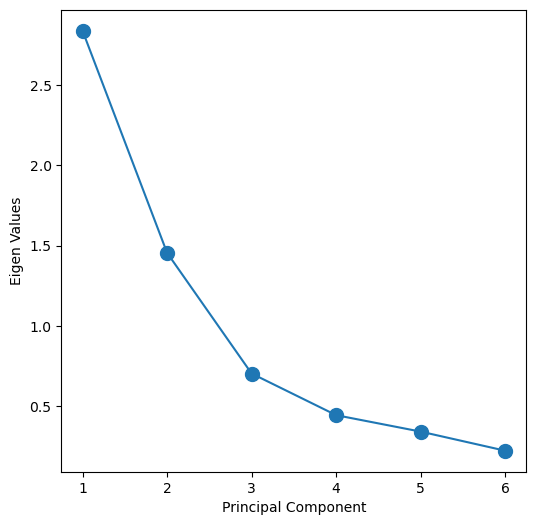

In [236]:
# scree plot (Eigen Values against sorted PCs)
plt.figure(figsize=(6, 6))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.xticks(np.arange(1, 7)) 
plt.plot(np.arange(1,7), pcaBuzzAnd.explained_variance_)
plt.scatter(np.arange(1,7), pcaBuzzAnd.explained_variance_, s = 100)
plt.savefig(r'Scree-PCA.png', transparent = "true")

In [237]:
#converting the PCA values to a dataframe
pcsBuzzAnddf = pd.DataFrame(pcsBuzzAnd, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pcsBuzzAnddf

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392
1,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720
2,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304
3,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240
4,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117
...,...,...,...,...,...,...
57,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002
58,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071
59,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026
60,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143


In [238]:
#combining bo and pcsBuzzdf dataframes
bo3 = bo.copy()
for i in pcsBuzzAnddf.columns:
    bo3[i] = pcsBuzzAnddf[i]
bo3

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,...,lbox,laddict,lcmngsoon,lfandango,PC1,PC2,PC3,PC4,PC5,PC6
0,19167085,0,0,0,28.0,19.83,0,0,1,0,...,16.768705,8.969605,2.302585,4.969813,0.727800,0.038162,1.204158,1.123466,-0.117357,-0.448392
1,63106589,0,1,0,150.0,32.69,1,0,0,1,...,17.960336,8.654692,4.077537,6.148468,-2.637946,-1.370233,1.077239,-0.251879,0.013417,-0.366720
2,5401605,0,0,0,37.4,15.69,0,0,1,0,...,15.502207,6.745236,3.178054,5.288267,1.542932,-0.469245,0.076520,-0.857879,0.278870,0.224304
3,67528882,0,0,1,200.0,23.62,1,1,0,0,...,18.028066,9.637306,4.532599,7.483244,-3.605130,-0.458782,-0.388755,0.345631,0.690654,-0.445240
4,26223128,0,1,0,150.0,19.02,0,0,0,1,...,17.082152,8.428198,3.401197,7.011214,-1.453419,-0.892621,-0.777003,0.150703,1.127304,-0.218117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,...,17.898476,9.114435,4.219508,6.472346,-2.870020,-1.454298,0.723402,0.275331,0.139703,0.201002
58,5329240,0,0,1,22.0,4.25,0,1,0,0,...,15.488719,8.066521,4.543295,3.663562,1.015619,2.049672,2.170410,-1.181606,0.225858,-0.428071
59,23004765,0,0,1,16.7,5.96,0,0,0,0,...,16.951212,9.774745,4.060443,4.804021,0.412522,2.404608,1.172586,0.762127,-0.042936,-0.285026
60,70950500,0,0,1,85.0,16.62,1,1,0,0,...,18.077493,9.269521,6.386879,6.744059,-2.919339,1.181531,-0.091520,-0.711417,0.114676,0.378143


# Question 12: Next, run regressions using the number of principal components based on (i) Kaiser's Rule and “explained variance” thresholds of (ii) 60%, (iii) 70%, (iv) 80% and (v) 90%. Compare these regression models and explain which one you would recommend, and why?

##### Threshold: Kaiser, 60% & 70% of cummulative explained variability

In [239]:
x = bo3[["G", "PG", "PG13", "sequel", "action", "comedy", "animated", "horror", "PC1", "PC2"]]
x = sm.add_constant(x)
y = bo3["lbox"]

In [240]:
print("Model with Kaiser threshold\n& 60 & 70% of cummulative explained variability variables:")
model = sm.OLS(y, x)
results = model.fit()
results.summary()

Model with Kaiser threshold
& 60 & 70% of cummulative explained variability variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.70e-07
Time:                        19:27:08   Log-Likelihood:                -56.220
No. Observations:                  62   AIC:                             134.4
Df Residuals:                      51   BIC:                             157.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4428      0.215     76.618      0.000      16.012      16.874
G              0.3972      0.544      0.731      0.468      -0.694       1.488
PG             0.5528      0.298      1.852      0.070      -0.046       1.152
PG13           0.2317      0.219      1.058      0.295      -0.208       0.671
sequel         0.2697      0.268      1.008      0.318      -0.267       0.807
action        -0.8831      0.291     -3.031      0.004      -1.468      -0.298
comedy        -0.0196      0.253     -0.077      0.939      -0.528       0.488
animated      -0.8129      0.424     -1.917      0.061      -1.664       0.038
horror         0.3219      0.363      0.887      0.379      -0.407       1.051
PC1           -0.4596      0.061     -7.586      0.000      -0.581      -0.338
PC2            0.1107      0.094      1.175      0.245      -0.078       0.300
==============================================================================
Omnibus:                        1.552   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.952
Skew:                          -0.280   Prob(JB):                        0.621
Kurtosis:                       3.236   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Threshold: 80% of cummulative explained variability

In [241]:
x = bo3[["G", "PG", "PG13", "sequel", "action", "comedy", "animated", "horror", "PC1", "PC2", "PC3"]]
x = sm.add_constant(x)
y = bo3["lbox"]

In [242]:
print("Model with 80% of cummulative explained variability variables:")
model = sm.OLS(y, x)
results = model.fit()
results.summary()

Model with 80% of cummulative explained variability variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     7.198
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.64e-07
Time:                        19:27:08   Log-Likelihood:                -54.407
No. Observations:                  62   AIC:                             132.8
Df Residuals:                      50   BIC:                             158.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4289      0.211     77.991      0.000      16.006      16.852
G              0.5136      0.537      0.956      0.344      -0.566       1.593
PG             0.5639      0.293      1.926      0.060      -0.024       1.152
PG13           0.2335      0.215      1.087      0.282      -0.198       0.665
sequel         0.3638      0.268      1.358      0.181      -0.174       0.902
action        -0.8945      0.286     -3.130      0.003      -1.469      -0.320
comedy        -0.0340      0.248     -0.137      0.892      -0.533       0.465
animated      -0.8266      0.416     -1.988      0.052      -1.662       0.009
horror         0.3377      0.356      0.948      0.348      -0.378       1.053
PC1           -0.4542      0.060     -7.632      0.000      -0.574      -0.335
PC2            0.1038      0.092      1.123      0.267      -0.082       0.290
PC3            0.1768      0.102      1.735      0.089      -0.028       0.381
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.693
Skew:                          -0.255   Prob(JB):                        0.707
Kurtosis:                       3.087   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Threshold: 90% of cummulative explained variability

In [243]:
x = bo3[["G", "PG", "PG13", "sequel", "action", "comedy", "animated", "horror", "PC1", "PC2", "PC3", "PC4"]]
x = sm.add_constant(x)
y = bo3["lbox"]

In [244]:
print("Model with 90% of cummulative explained variability variables:")
model = sm.OLS(y, x)
results = model.fit()
results.summary()

Model with 90% of cummulative explained variability variables:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lbox   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     6.491
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           9.69e-07
Time:                        19:27:08   Log-Likelihood:                -54.333
No. Observations:                  62   AIC:                             134.7
Df Residuals:                      49   BIC:                             162.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4091      0.220     74.466      0.000      15.966      16.852
G              0.5957      0.593      1.004      0.320      -0.597       1.788
PG             0.6003      0.314      1.911      0.062      -0.031       1.231
PG13           0.2405      0.218      1.105      0.275      -0.197       0.678
sequel         0.4099      0.302      1.356      0.181      -0.198       1.018
action        -0.8706      0.297     -2.933      0.005      -1.467      -0.274
comedy        -0.0407      0.251     -0.162      0.872      -0.546       0.464
animated      -0.8602      0.431     -1.996      0.052      -1.726       0.006
horror         0.3227      0.362      0.891      0.377      -0.405       1.050
PC1           -0.4480      0.063     -7.141      0.000      -0.574      -0.322
PC2            0.1023      0.093      1.095      0.279      -0.085       0.290
PC3            0.1814      0.104      1.750      0.086      -0.027       0.390
PC4            0.0562      0.165      0.340      0.735      -0.276       0.388
==============================================================================
Omnibus:                        0.997   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.596
Skew:                          -0.234   Prob(JB):                        0.742
Kurtosis:                       3.108   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""